In [1]:
path = '/h/pwilson/projects/medAI/projects/prostnfound/logs/test/optimum_test/16607523/metrics_by_core.csv'
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

table = pd.read_csv(path, index_col=0)
y = table['label']
y_hat = table['average_needle_heatmap_value']
table['logloss'] = - (y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))


def load_image(core_id):

    row = table.loc[table['core_id'] == core_id].iloc[0]
    grade = row['grade']

    d = os.path.dirname(path)
    fp = os.path.join(d, grade, f"{core_id}.png")

    from PIL import Image 
    return Image.open(fp)


In [2]:
table['prop_prod_err'] = (table['average_needle_heatmap_value'] - table['involvement']).abs()
print(table['prop_prod_err'].mean())
print(table['prop_prod_err'].median())

0.15548776731369837
0.08867245999999995


In [3]:
table.groupby('grade_group')['prop_prod_err'].median()

grade_group
1.0    0.141254
2.0    0.225184
3.0    0.220509
4.0    0.210003
5.0    0.270829
Name: prop_prod_err, dtype: float64

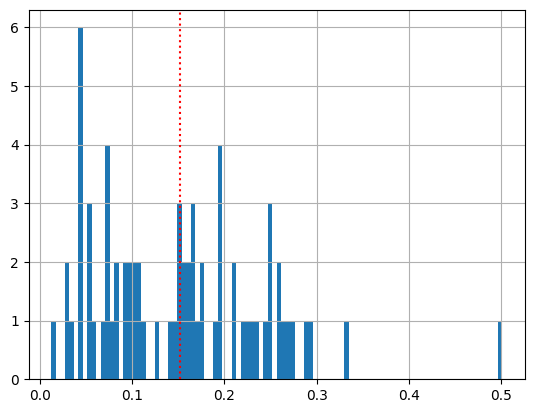

In [4]:
table.groupby('patient_id').prop_prod_err.mean().hist(bins=100)
plt.axvline(table.groupby('patient_id')['prop_prod_err'].mean().median(), c='red', ls=':')

0.15170665118888887
UA-017-022


/tmp/ipykernel_19945/1023645164.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(series_[k])


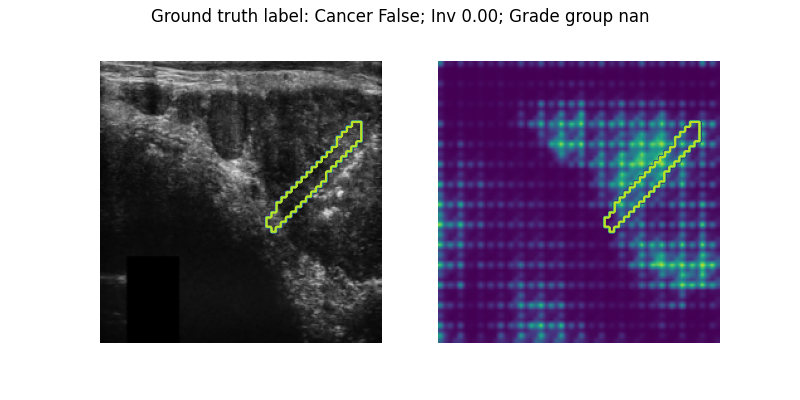

In [5]:
# k'th worst patient
series_ = table.groupby('patient_id').prop_prod_err.mean().sort_values(ascending=False)
k = len(series_) // 2
patient_id = series_.index[k]
print(series_[k])

core_ids = table.loc[table['patient_id'] == patient_id].core_id.values

core_id = core_ids[4]
print(core_id)
load_image(core_id)

In [6]:
table.loc[table['patient_id'] == patient_id]

,center,core_id,patient_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,involvement,clinically_significant,entropy,topk_score,logloss,prop_prod_err
493,UA,UA-017-006,UA-017,RM 2.1,Carcinoma,0.822785,0.0,0.169545,30.0,2.0,0.160221,0.054004,1,0.30,False,3.951152,0.126694,1.831200,0.139779
494,UA,UA-017-008,UA-017,RM 2.3,Carcinoma,0.822785,0.0,0.169545,30.0,2.0,0.071235,0.045686,1,0.30,False,3.217472,0.107046,2.641769,0.228765
495,UA,UA-017-023,UA-017,LMB,Carcinoma,0.822785,0.0,0.169545,5.0,2.0,0.034881,0.108148,1,0.05,False,3.569870,0.055316,3.355821,0.015119
496,UA,UA-017-009,UA-017,LA 1.1,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.081244,0.081177,1,0.05,False,3.756333,0.043809,2.510295,0.031244
497,UA,UA-017-022,UA-017,LLB,Benign,0.822785,0.0,0.169545,NaN,NaN,0.329913,0.117684,0,0.00,False,4.245420,0.362515,0.400347,0.329913
498,UA,UA-017-016,UA-017,RLB,Carcinoma,0.822785,0.0,0.169545,5.0,2.0,0.220844,0.093272,1,0.05,False,4.053510,0.215705,1.510296,0.170844
499,UA,UA-017-018,UA-017,LLA,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.577866,0.145699,1,0.05,False,4.368172,0.627733,0.548413,0.527866
500,UA,UA-017-015,UA-017,RMM,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.360001,0.119908,1,0.05,False,4.029228,0.614260,1.021648,0.310001
501,UA,UA-017-020,UA-017,LLM,Benign,0.822785,0.0,0.169545,NaN,NaN,0.050448,0.040616,0,0.00,False,3.412233,0.010393,0.051765,0.050448
502,UA,UA-017-021,UA-017,LMM,Benign,0.822785,0.0,0.169545,NaN,NaN,0.006373,0.063153,0,0.00,False,3.374020,0.003909,0.006394,0.006373


In [7]:
table.groupby('patient_id').prop_prod_err.mean().sort_values(ascending=False)

patient_id
UA-140    0.500606
UA-033    0.334069
UA-031    0.295467
UA-113    0.286661
UA-064    0.271585
            ...   
UA-032    0.042401
UA-158    0.034659
UA-157    0.028650
UA-038    0.028443
UA-016    0.012490
Name: prop_prod_err, Length: 71, dtype: float64

In [8]:
patient_id

'UA-017'

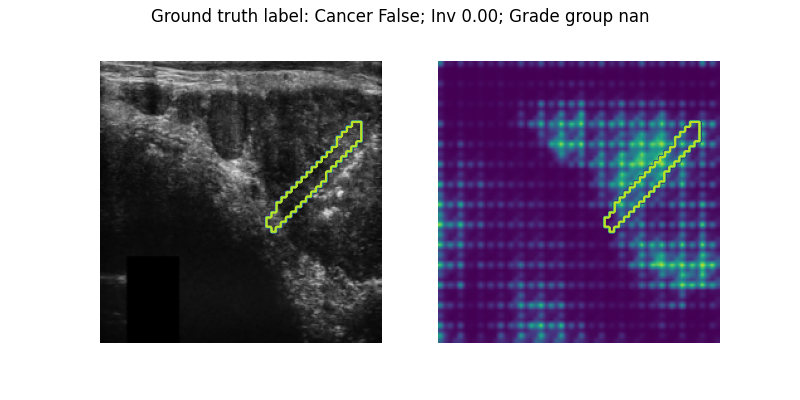

In [9]:
load_image(core_id)

In [10]:
table.loc[table['patient_id'] == patient_id]

,center,core_id,patient_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,involvement,clinically_significant,entropy,topk_score,logloss,prop_prod_err
493,UA,UA-017-006,UA-017,RM 2.1,Carcinoma,0.822785,0.0,0.169545,30.0,2.0,0.160221,0.054004,1,0.30,False,3.951152,0.126694,1.831200,0.139779
494,UA,UA-017-008,UA-017,RM 2.3,Carcinoma,0.822785,0.0,0.169545,30.0,2.0,0.071235,0.045686,1,0.30,False,3.217472,0.107046,2.641769,0.228765
495,UA,UA-017-023,UA-017,LMB,Carcinoma,0.822785,0.0,0.169545,5.0,2.0,0.034881,0.108148,1,0.05,False,3.569870,0.055316,3.355821,0.015119
496,UA,UA-017-009,UA-017,LA 1.1,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.081244,0.081177,1,0.05,False,3.756333,0.043809,2.510295,0.031244
497,UA,UA-017-022,UA-017,LLB,Benign,0.822785,0.0,0.169545,NaN,NaN,0.329913,0.117684,0,0.00,False,4.245420,0.362515,0.400347,0.329913
498,UA,UA-017-016,UA-017,RLB,Carcinoma,0.822785,0.0,0.169545,5.0,2.0,0.220844,0.093272,1,0.05,False,4.053510,0.215705,1.510296,0.170844
499,UA,UA-017-018,UA-017,LLA,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.577866,0.145699,1,0.05,False,4.368172,0.627733,0.548413,0.527866
500,UA,UA-017-015,UA-017,RMM,Carcinoma,0.822785,0.0,0.169545,5.0,1.0,0.360001,0.119908,1,0.05,False,4.029228,0.614260,1.021648,0.310001
501,UA,UA-017-020,UA-017,LLM,Benign,0.822785,0.0,0.169545,NaN,NaN,0.050448,0.040616,0,0.00,False,3.412233,0.010393,0.051765,0.050448
502,UA,UA-017-021,UA-017,LMM,Benign,0.822785,0.0,0.169545,NaN,NaN,0.006373,0.063153,0,0.00,False,3.374020,0.003909,0.006394,0.006373


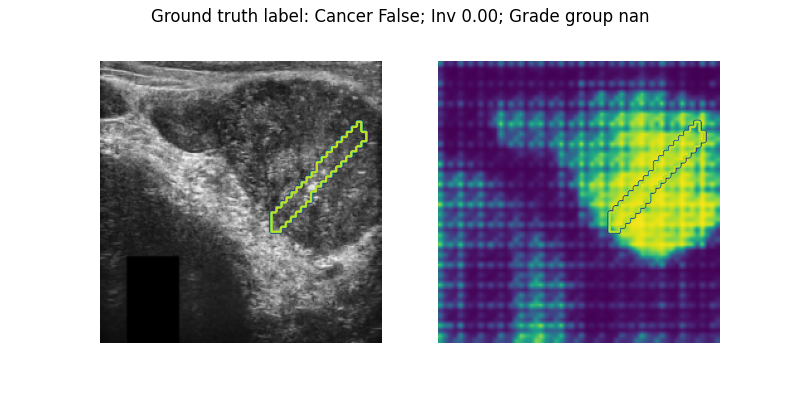

In [11]:
import os


idx = 0
table_sorted = table.sort_values(by='prop_prod_err', ascending=False).reset_index(drop=True)
core_id = table_sorted.core_id[idx]
grade = table_sorted.grade[idx]

d = os.path.dirname(path)
fp = os.path.join(d, grade, f"{core_id}.png")

from PIL import Image 
Image.open(fp)


In [12]:
table_sorted

,center,core_id,patient_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,involvement,clinically_significant,entropy,topk_score,logloss,prop_prod_err
0,UA,UA-140-018,UA-140,LLM,Benign,0.848101,0.0,0.342229,NaN,NaN,0.891559,0.295258,0,0.00,False,4.491863,0.868534,2.221548,0.891559
1,UA,UA-037-012,UA-037,RMB,Carcinoma,0.898734,0.0,1.029827,90.0,5.0,0.029934,0.076666,1,0.90,False,3.631110,0.007218,3.508754,0.870066
2,UA,UA-075-010,UA-075,RLA,Benign,0.759494,0.0,0.643642,NaN,NaN,0.839891,0.374369,0,0.00,False,4.476153,0.769213,1.831900,0.839891
3,UA,UA-075-004,UA-075,RMM 1.1,Benign,0.759494,0.0,0.643642,NaN,NaN,0.808549,0.377774,0,0.00,False,4.470525,0.792266,1.653121,0.808549
4,UA,UA-140-007,UA-140,R B-A 2.1,Carcinoma,0.848101,0.0,0.342229,5.0,2.0,0.756338,0.276221,1,0.05,False,4.433316,0.846537,0.279267,0.706338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,UA,UA-086-009,UA-086,RMB,Benign,0.822785,0.0,0.320251,NaN,NaN,0.001657,0.059858,0,0.00,False,3.336824,0.001820,0.001658,0.001657
1037,UA,UA-129-015,UA-129,LMB,Benign,0.848101,0.0,0.464678,NaN,NaN,0.001637,0.176844,0,0.00,False,3.640681,0.001063,0.001639,0.001637
1038,UA,UA-158-015,UA-158,LMB,Benign,0.810127,0.0,0.229199,NaN,NaN,0.000998,0.056102,0,0.00,False,3.125264,0.001334,0.000999,0.000998
1039,UA,UA-106-009,UA-106,RMM,Benign,0.962025,0.0,0.596546,NaN,NaN,0.000236,0.143269,0,0.00,False,3.945129,0.000284,0.000236,0.000236


In [13]:
table['pct_cancer'].loc[table['pct_cancer'].isna()] = 0 


/tmp/ipykernel_19945/1980656886.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table['pct_cancer'].loc[table['pct_cancer'].isna()] = 0
/tmp/ipykernel_19945/1980656886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy 

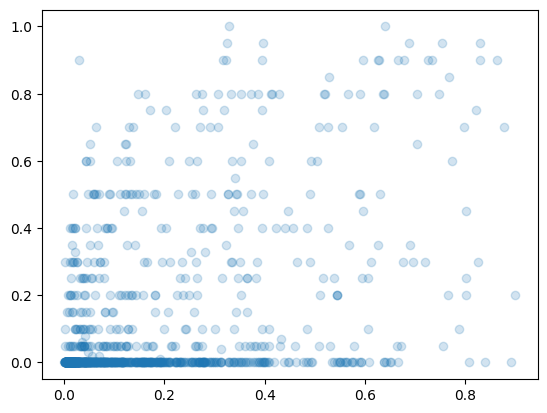

In [14]:
plt.scatter(
    table['average_needle_heatmap_value'], table['involvement'], alpha=0.2
)

{'auc': 0.721984288295264,
 'weighted_auc': 0.721984288295264,
 'auprc': 0.5971901238439269,
 'sens_at_20_spe': 0.964769647696477,
 'sens_at_40_spe': 0.8699186991869918,
 'sens_at_60_spe': 0.6991869918699187,
 'sens_at_80_spe': 0.5040650406504065,
 'f1': 0.5738916256157636,
 'balanced_acc_best': 0.5,
 'balanced_acc': 0.5777378532713898,
 'spec': 0.9657738095238095,
 'sens': 0.1897018970189702,
 'histogram': <Figure size 640x480 with 1 Axes>,
 'roc_curve': <Figure size 640x480 with 1 Axes>}

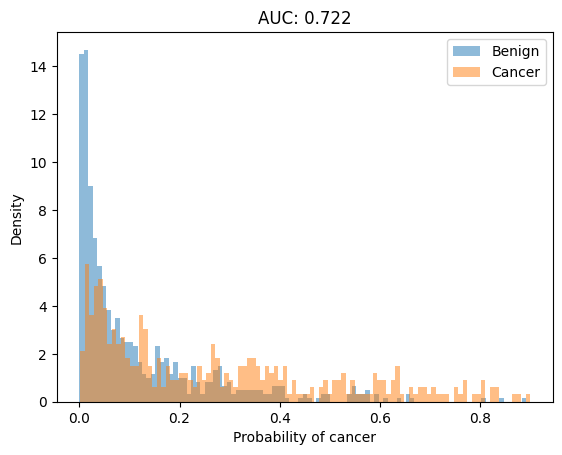

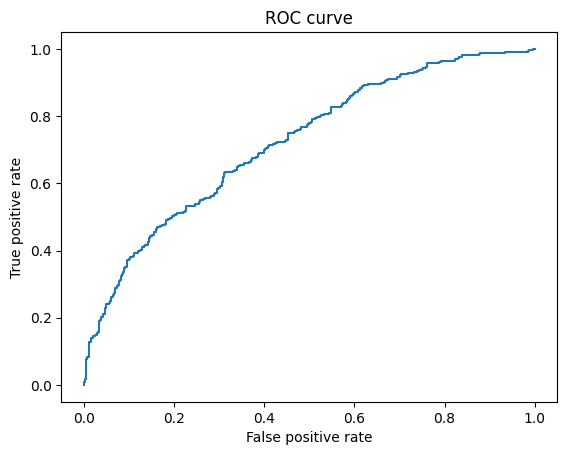

In [14]:
import numpy as np
from medAI.metrics import calculate_binary_classification_metrics

metrics = calculate_binary_classification_metrics(
    table['average_needle_heatmap_value'], table['label'], log_images=True, image_fmt='plt'
)
metrics

# table['error'] = np.absolute(table['average_needle_heatmap_value'] - table['label'])
# table.groupby('patient_id').error.mean().hist()


In [10]:
metrics

{'auc': 0.7741490935997041,
 'weighted_auc': 0.7741490935997041,
 'auprc': 0.44369751419282877,
 'sens_at_20_spe': 0.9416666666666667,
 'sens_at_40_spe': 0.9,
 'sens_at_60_spe': 0.775,
 'sens_at_80_spe': 0.6,
 'f1': 0.3764705882352941,
 'balanced_acc_best': 0.5,
 'balanced_acc': 0.62139752127266,
 'spec': 0.9844617092119867,
 'sens': 0.25833333333333336,
 'histogram': <Figure size 640x480 with 1 Axes>,
 'roc_curve': <Figure size 640x480 with 1 Axes>}

{'auc': 0.7649331080772568,
 'weighted_auc': 0.7649331080772568,
 'auprc': 0.4303313608964574,
 'sens_at_20_spe': 0.9421487603305785,
 'sens_at_40_spe': 0.859504132231405,
 'sens_at_60_spe': 0.7355371900826446,
 'sens_at_80_spe': 0.628099173553719,
 'f1': 0.4143646408839779,
 'balanced_acc_best': 0.5,
 'balanced_acc': 0.5972284370576686,
 'spec': 0.9878453038674033,
 'sens': 0.2066115702479339,
 'histogram': <Figure size 640x480 with 1 Axes>,
 'roc_curve': <Figure size 640x480 with 1 Axes>}

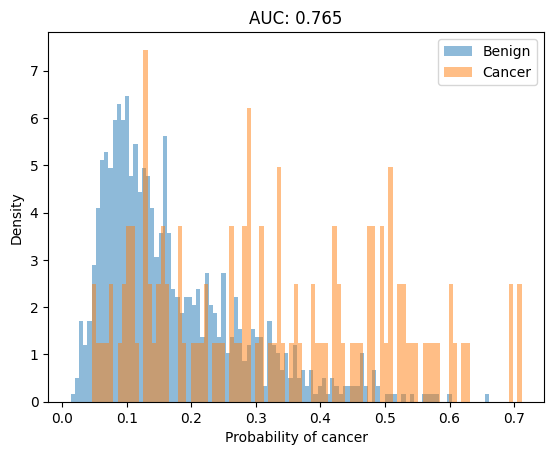

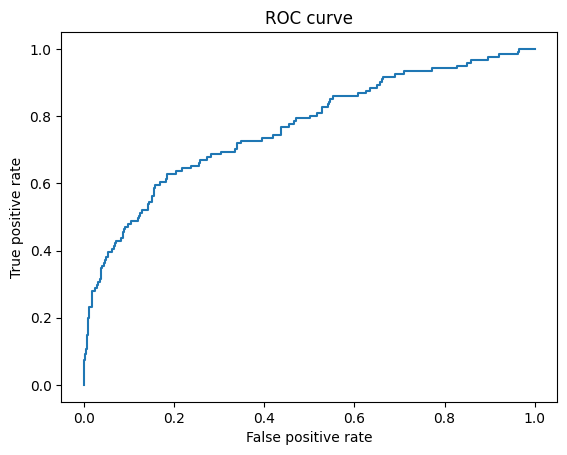

In [29]:
metrics = calculate_binary_classification_metrics(
    table['average_prostate_heatmap_value'], table['label'], log_images=True, image_fmt='plt'
)
metrics

In [9]:
table_patient = table.groupby('patient_id').first()
table_patient['error'] = table.groupby('patient_id').logloss.mean()

In [10]:
table_patient.groupby('grade_group').logloss.mean()

grade_group
0.0    0.842997
2.0    0.377030
3.0    0.513318
4.0    0.117178
Name: logloss, dtype: float64

In [11]:
table_patient.logloss.mean()
table_patient.sort_values(by='logloss')

,center,core_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,logloss,error
patient_id,,,,,,,,,,,,,,
PMCC-0108,PMCC,PMCC-0108_LAM,3,GS7,0.772152,0,0.144427,5.0,2.0,0.912801,0.903144,1,0.091237,0.117773
PMCC-0096,PMCC,PMCC-0096_LAL,5,GS7,0.848101,0,0.347567,80.0,2.0,0.910587,0.896594,1,0.093666,0.867944
UVA-0174,UVA,UVA-0174_LAL,5,GS8,0.974684,0,0.166405,80.0,4.0,0.889426,0.883297,1,0.117178,0.407446
PMCC-0104,PMCC,PMCC-0104_LAL,5,GS7,0.658228,0,0.270958,70.0,2.0,0.887564,0.885390,1,0.119275,0.406263
UVA-0085,UVA,UVA-0085_LAM,3,GS7,0.784810,0,0.734694,10.0,2.0,0.841993,0.809125,1,0.171983,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UVA-0577,UVA,UVA-0577_LAM,3,Benign,0.873418,0,0.392465,0.0,0.0,0.773884,0.775365,0,1.486708,0.956076
UVA-0239,UVA,UVA-0239_LAL,5,Benign,0.936709,0,0.566405,0.0,0.0,0.808020,0.836737,0,1.650363,1.426924
CRCEO-0365,CRCEO,CRCEO-0365_LAL,5,Benign,0.886076,0,0.022606,0.0,0.0,0.808147,0.779886,0,1.651024,1.240956


<Axes: >

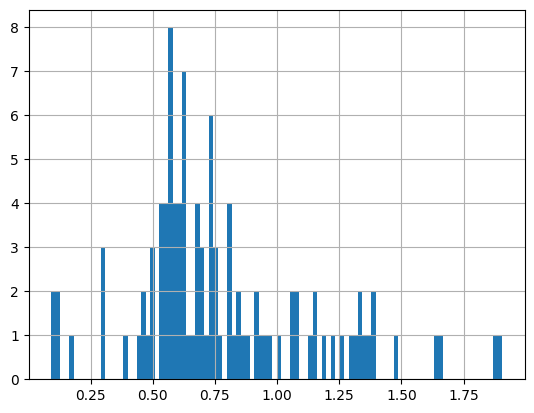

In [14]:
table_patient.logloss.hist(bins=100)